<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Desarrollo taller 1 - Histogramas</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg/598px-Escudo_de_la_Universidad_Nacional_de_Colombia_%282016%29.svg.png" alt="Escudo UNAL" style="width:200px;height:250px;">

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Técnicas de Inteligencia Artificial - Visión de Máquina</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Marzo de 2023</p>
<p style="font-size:120%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Integrantes</p>
<p style="font-size:100%; text-align:left; line-height : 10px; margin-top : 0; "> <br>Valentina Hernandez</p>
<p style="font-size:100%; text-align:left; line-height : 10px; margin-top : 0; "> <br>Manuel Rojas</p>
<p style="font-size:100%; text-align:left; line-height : 10px; margin-top : 0; "> <br>Felipe Gutierrez</p>


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

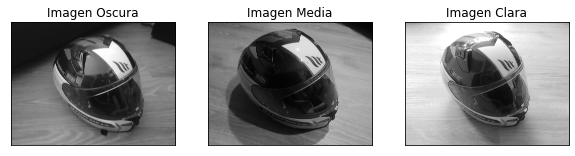

In [2]:
# Se cargan las imagenes tomadas en esacala de grises y se muestran en pantalla

imgOscura = cv2.imread("pics/CascoOsc.jpg", 0)
imgMedia = cv2.imread("pics/CascoArt.jpg", 0)
imgClara = cv2.imread("pics/CascoCla.jpg", 0)

plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(imgOscura, cmap='gray')
plt.title('Imagen Oscura'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgMedia, cmap='gray')
plt.title('Imagen Media'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(imgClara, cmap='gray')
plt.title('Imagen Clara'), plt.xticks([]), plt.yticks([])

plt.show()


### N° de bins = 2

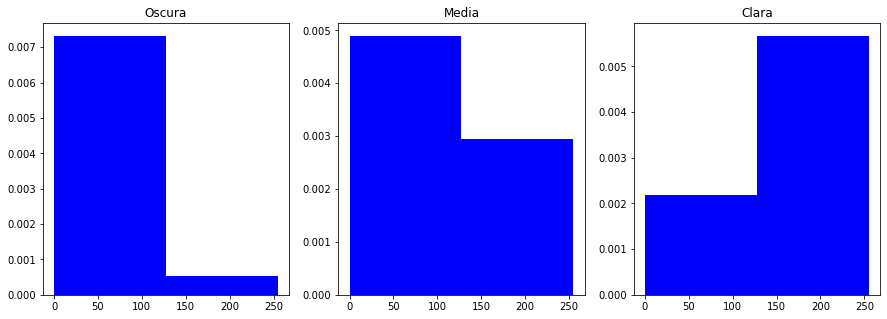

In [3]:
# Se comienza con una división de 2 bins que se obtienen con las funciones tanto de las librerías de openCV como de 
# matplotlib. Esto con el fin de obtener gráficas por columnas con matplotlib y de, más adelante, evaluar compparación de 
# los respectivos histogramas con cv2.

bins = 2

histOscura = cv2.calcHist([imgOscura], [0], None, [bins], [0,256])
histMedia = cv2.calcHist([imgMedia], [0], None, [bins], [0,256])
histClara = cv2.calcHist([imgClara], [0], None, [bins], [0,256])


cv2.normalize(histOscura, histOscura, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(histMedia, histMedia, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(histClara, histClara, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=(15,5))

plt.subplot(131).set_title('Oscura'),plt.hist(imgOscura.ravel(), bins, [0,255], color='blue', density=1)
plt.subplot(132).set_title('Media'), plt.hist(imgMedia.ravel(), bins, [0,255], color='blue', density=1)
plt.subplot(133).set_title('Clara'), plt.hist(imgClara.ravel(), bins, [0,255], color='blue', density=1)

plt.show()

In [4]:
# El ciclo for permite recorrer los cuatro tipos de comparaciones de histogramas vistos al ser iterados mediante la variable
# local i ya que la función compareHist, en su tercer argumento, selecciona a cada uno de ellos en cada vuelta.

for i in range(0, 4):

    metric_corr = cv2.compareHist(histOscura, histMedia, i)

    opcion = i

    variable_nombre = ''

    if opcion == 0:
        variable_nombre = 'Correlation'
    elif opcion == 1:
        variable_nombre = 'Chi-square'
    elif opcion == 2:
        variable_nombre = 'Intersection'
    elif opcion == 3:
        variable_nombre = 'Bhattacharyya'
    else:
        print('Opción no válida')

    print(f"Comparación (Oscura y Media): {variable_nombre}   {metric_corr}")

print()

for i in range(0, 4):

    metric_corr = cv2.compareHist(histOscura, histClara, i)

    opcion = i

    variable_nombre = ''

    if opcion == 0:
        variable_nombre = 'Correlation'
    elif opcion == 1:
        variable_nombre = 'Chi-square'
    elif opcion == 2:
        variable_nombre = 'Intersection'
    elif opcion == 3:
        variable_nombre = 'Bhattacharyya'
    else:
        print('Opción no válida')

    print(f"Comparación (Oscura y Clara): {variable_nombre}   {metric_corr}")


Comparación (Oscura y Media): Correlation   1.0
Comparación (Oscura y Media): Chi-square   1.4210854715202004e-14
Comparación (Oscura y Media): Intersection   0.9999998807907104
Comparación (Oscura y Media): Bhattacharyya   0.0

Comparación (Oscura y Clara): Correlation   -1.0
Comparación (Oscura y Clara): Chi-square   1.0
Comparación (Oscura y Clara): Intersection   0.0
Comparación (Oscura y Clara): Bhattacharyya   1.0


- Se observa que la correlación entre los histogramas de la imagen oscura y media, y la correlación entre los histogramas de la imagen oscura y clara son completamente distintos. La primera muestra una correlación directa y la segunda muestra una correlación inversa.
- La comparación por chi-cuadrado muestra una diferenciación de un valor de uno entre los histogramas de las imágenes oscura y clara, mientras que la comparación entre los histogramas de las imágenes oscura y media muestran similitud muy cercana al cero.
- La comparación por intersección muestra un nivel de similitud bastante bueno (cercano a uno) entre los histogramas de las imágenes oscura y clara, mientras que entre los histogramas de las imágenes oscura y media su relación es nula.
- El método estadístico de comparación por Bhattacharyya nos muestra un nivel de similitud decente entre los histogramas de las imágenes oscura y clara, a diferencia de los histogramas de las imágenes oscura y media dado que nuevamente su relación es intermedia.

### N° de bins = 16

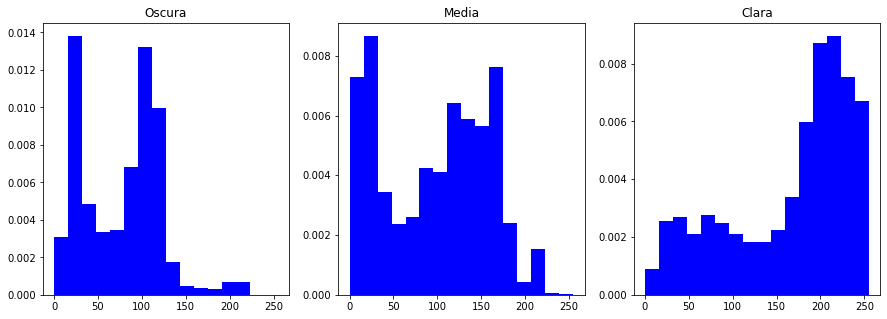

In [5]:
bins = 16

histOscura = cv2.calcHist([imgOscura], [0], None, [bins], [0,256])
histMedia = cv2.calcHist([imgMedia], [0], None, [bins], [0,256])
histClara = cv2.calcHist([imgClara], [0], None, [bins], [0,256])


cv2.normalize(histOscura, histOscura, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(histMedia, histMedia, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(histClara, histClara, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)


plt.figure(figsize=(15,5))

plt.subplot(131).set_title('Oscura'), plt.hist(imgOscura.ravel(), bins, [0,255], color='blue', density=1)
plt.subplot(132).set_title('Media'), plt.hist(imgMedia.ravel(), bins, [0,255], color='blue', density=1)
plt.subplot(133).set_title('Clara'), plt.hist(imgClara.ravel(), bins, [0,255], color='blue', density=1)

plt.show()

In [6]:
for i in range(0, 4):

    metric_corr = cv2.compareHist(histOscura, histMedia, i)

    opcion = i

    variable_nombre = ''

    if opcion == 0:
        variable_nombre = 'Correlation'
    elif opcion == 1:
        variable_nombre = 'Chi-square'
    elif opcion == 2:
        variable_nombre = 'Intersection'
    elif opcion == 3:
        variable_nombre = 'Bhattacharyya'
    else:
        print('Opción no válida')

    print(f"Comparación (Oscura y Media): {variable_nombre}   {metric_corr}")

print()

for i in range(0, 4):

    metric_corr = cv2.compareHist(histOscura, histClara, i)

    opcion = i

    variable_nombre = ''

    if opcion == 0:
        variable_nombre = 'Correlation'
    elif opcion == 1:
        variable_nombre = 'Chi-square'
    elif opcion == 2:
        variable_nombre = 'Intersection'
    elif opcion == 3:
        variable_nombre = 'Bhattacharyya'
    else:
        print('Opción no válida')

    print(f"Comparación (Oscura y Clara): {variable_nombre}   {metric_corr}")

Comparación (Oscura y Media): Correlation   0.4878802044449306
Comparación (Oscura y Media): Chi-square   47.45762285701234
Comparación (Oscura y Media): Intersection   4.051416302099824
Comparación (Oscura y Media): Bhattacharyya   0.3464429430066346

Comparación (Oscura y Clara): Correlation   -0.5159916966308938
Comparación (Oscura y Clara): Chi-square   60.43040013335572
Comparación (Oscura y Clara): Intersection   1.5632880629247552
Comparación (Oscura y Clara): Bhattacharyya   0.6557472747092182


- Se observa que la correlación entre los histogramas de la imagen oscura y media, y la correlación entre los histogramas de la imagen oscura y clara cambain con respecto al obtenido con tan solo 2 bins. La primera muestra una correlación directa y la segunda muestra una correlación inversa aunque ya no con la misma intensidad de relacionamiento, sus valores han cambiado aproximadamente 0.5 unidades.
- La comparación por chi-cuadrado siguen mostrando una diferenciación marcada entre los histogramas de las imágenes oscura y clara que se ha agudizado con respecto a lo obtenido utilizando solo 2 bins, mientras que ahora y a pesar de ser menor en comparación, los histogramas de las imágenes oscura y media muestran una deifrecniación mucho mayor con respecto a su compración con 2 bins, su diferenciación en ambos caso, subió considerablemente alejandose del cero.
- La comparación por intersección muestra un nivel de similitud bastante bueno (cercano a uno) entre los histogramas de las imágenes oscura y clara, mientras que entre los histogramas de las imágenes oscura y media su relación es intermedia.
- El método estadístico de comparación por Bhattacharyya nos muestra un nivel de similitud decente entre los histogramas de las imágenes oscura y clara, a diferencia de los histogramas de las imágenes oscura y media dado que nuevamente su relación es intermedia.

### N° de bins = 256

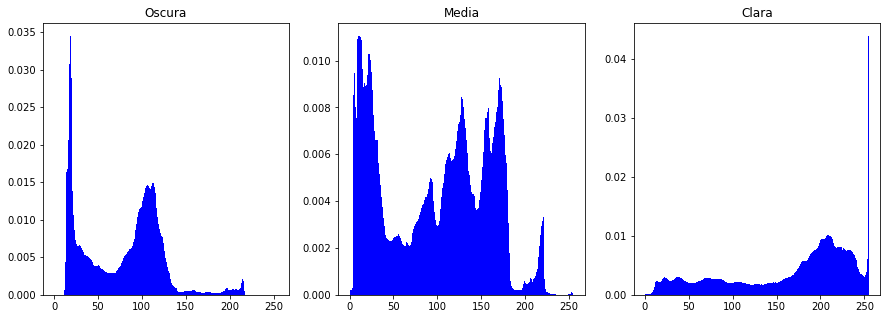

In [7]:
bins = 256

histOscura = cv2.calcHist([imgOscura], [0], None, [bins], [0,256])
histMedia = cv2.calcHist([imgMedia], [0], None, [bins], [0,256])
histClara = cv2.calcHist([imgClara], [0], None, [bins], [0,256])


cv2.normalize(histOscura, histOscura, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(histMedia, histMedia, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(histClara, histClara, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)


plt.figure(figsize=(15,5))

plt.subplot(131).set_title('Oscura'), plt.hist(imgOscura.ravel(), bins, [0,255], color='blue', density=1)
plt.subplot(132).set_title('Media'), plt.hist(imgMedia.ravel(), bins, [0,255], color='blue', density=1)
plt.subplot(133).set_title('Clara'), plt.hist(imgClara.ravel(), bins, [0,255], color='blue', density=1)

plt.show()

In [8]:
for i in range(0, 4):

    metric_corr = cv2.compareHist(histOscura, histMedia, i)

    opcion = i

    variable_nombre = ''

    if opcion == 0:
        variable_nombre = 'Correlation'
    elif opcion == 1:
        variable_nombre = 'Chi-square'
    elif opcion == 2:
        variable_nombre = 'Intersection'
    elif opcion == 3:
        variable_nombre = 'Bhattacharyya'
    else:
        print('Opción no válida')

    print(f"Comparación (Oscura y Media): {variable_nombre}   {metric_corr}")

print()

for i in range(0, 4):

    metric_corr = cv2.compareHist(histOscura, histClara, i)

    opcion = i

    variable_nombre = ''

    if opcion == 0:
        variable_nombre = 'Correlation'
    elif opcion == 1:
        variable_nombre = 'Chi-square'
    elif opcion == 2:
        variable_nombre = 'Intersection'
    elif opcion == 3:
        variable_nombre = 'Bhattacharyya'
    else:
        print('Opción no válida')

    print(f"Comparación (Oscura y Clara): {variable_nombre}   {metric_corr}")

Comparación (Oscura y Media): Correlation   0.4057589770331756
Comparación (Oscura y Media): Chi-square   209308.02194262668
Comparación (Oscura y Media): Intersection   28.199428473654507
Comparación (Oscura y Media): Bhattacharyya   0.4139700729275157

Comparación (Oscura y Clara): Correlation   -0.29910258009431695
Comparación (Oscura y Clara): Chi-square   193.17166578287976
Comparación (Oscura y Clara): Intersection   7.718407799223655
Comparación (Oscura y Clara): Bhattacharyya   0.6138855857333889
